<a href="https://colab.research.google.com/github/LEEAHRI/project/blob/main/%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Sharing Demand
### 날씨를 이용한 자전거렌탈 수요 예측 시스템 

###### feature
- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
    1:봄, 2:여름, 3:가을, 4:겨울
- holiday - whether the day is considered a holiday
    1:주말을 제외한 휴일(공휴일) , 0:휴일아닌날
- workingday - whether the day is neither a weekend nor holiday
    1:평일(주중), 0:주말 및 휴일
- weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy맑음,약간 구름낀 흐림
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist안개+흐림
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +Scattered clouds가벼운 눈, 가벼운 비 + 천둥
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 심한 눈/비, 천둥/번개 
- temp - temperature in Celsius 온도(섭씨)
- atemp - "feels like" temperature in Celsius 체감온도(섭씨)
- humidity - relative humidity 상대습도
- windspeed - wind speed 풍속
- casual - number of non-registered user rentals initiated 비회원 대여
- registered - number of registered user rentals initiated 회원 대여
- count - number of total rentals

###### target='count'
총 렌탈 수 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#전처리
from sklearn.preprocessing import LabelEncoder, StandardScaler

#데이터분리
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV

In [ ]:
#데이터 불러오기
import pandas as pd
train = pd.read_csv('C://Users/dkfl4/OneDrive/바탕 화면/train.csv')
test=pd.read_csv('C://Users/dkfl4/OneDrive/바탕 화면/test.csv')

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
train['count']

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [ ]:
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [ ]:
#train과 test사이에 어떠한 차이가 있을까? 

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


test에는 'casual'과 'registerd'그리고 target인 'count'가 빠져있다. 

## 데이터 전처리 & Feature Engineering

In [ ]:
'''
#datetime컬럼 변경
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])
'''

"\n#datetime컬럼 변경\ntrain['datetime'] = pd.to_datetime(train['datetime'])\ntest['datetime'] = pd.to_datetime(test['datetime'])\n"

In [ ]:
'''
#datetime에 대해서 새로운 컬럼 생성 
train['year'] = train['datetime'].apply(lambda x: x.year)
train['month'] = train['datetime'].apply(lambda x: x.month)
train['day'] = train['datetime'].apply(lambda x: x.day)
train['hour'] = train['datetime'].apply(lambda x: x.hour)

test['year'] = test['datetime'].apply(lambda x: x.year)
test['month'] = test['datetime'].apply(lambda x: x.month)
test['day'] = test['datetime'].apply(lambda x: x.day)
test['hour'] = test['datetime'].apply(lambda x: x.hour)
'''

In [ ]:
#추가적 date와 minute,second컬럼 생성. 
train['date'] = train['datetime'].apply(lambda x: x.split()[0]) 
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0]) 
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1]) 
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2]) 
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1]) 
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0]) 

test['date'] = test['datetime'].apply(lambda x: x.split()[0]) 
test['year'] = test['datetime'].apply(lambda x: x.split()[0].split('-')[0]) 
test['month'] = test['datetime'].apply(lambda x: x.split()[0].split('-')[1]) 
test['day'] = test['datetime'].apply(lambda x: x.split()[0].split('-')[2]) 
test['minute'] = test['datetime'].apply(lambda x: x.split()[1].split(':')[1]) 
test['second'] = test['datetime'].apply(lambda x: x.split()[1].split(':')[2])
test['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0]) 

In [ ]:
#weekday컬럼 형성 
from datetime import datetime
import calendar

print(train['date'][100]) # date
print(datetime.strptime(train.date[100], '%Y-%m-%d')) # Change to datetime type
print(datetime.strptime(train.date[100], '%Y-%m-%d').weekday()) # Returns weekday as an integer
print(calendar.day_name[datetime.strptime(train.date[100], '%Y-%m-%d').weekday()]) # Returns weekday as a string

print(test['date'][100]) # date
print(datetime.strptime(test.date[100], '%Y-%m-%d')) # Change to datetime type
print(datetime.strptime(test.date[100], '%Y-%m-%d').weekday()) # Returns weekday as an integer
print(calendar.day_name[datetime.strptime(test.date[100], '%Y-%m-%d').weekday()]) # Returns weekday as a string


2011-01-05
2011-01-05 00:00:00
2
Wednesday
2011-01-24
2011-01-24 00:00:00
0
Monday


In [ ]:
train['weekday'] = train['date'].apply(lambda dateString: calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
test['weekday'] = train['date'].apply(lambda dateString: calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])

In [ ]:
train.head()

In [ ]:
train.info()

In [ ]:
test.info()

In [ ]:
#기존 datetime컬럼 제거. 
#test에는 없는 casual+registered제거 (casul+registerd=count이므로 제거무방.)
train = train.drop(['datetime', 'casual', 'registered'], axis=1)
test = test.drop(['datetime'], axis=1)

In [ ]:
#missing 확인
print('train:',train.isnull().sum())

In [ ]:
train

## EDA

내가 보고 싶은 가설 
1. month에 따라서 count의 변화 -> 날씨가 추워짐에 따라 대여 수는 줄어들 것이다. 
2. holiday와 workingday에 count비교 -> 쉬는 날에 대여 수는 늘어날 것이다. 
3. 시간대 별 count 비교 -> 출근 시간에는 고정으로 대여하는 사람이 있지 않을까? 
4. 기온에 따른 count 변화 -> 따뜻해야 자전거를 탈 수 있으니까. 
5. temp와 atemp의 count비교 -> 내 예상으로는 atemp가 더 상관관계가 높을 듯 하다 

In [ ]:
#target의 변수 분포 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rc('font', size=15) # Set font size to 15
sns.distplot(train['count']);

In [ ]:
#log분포
sns.distplot(np.log(train['count']));

In [ ]:
'''
#가설1. month에 따라서 count가 어떻게 변할까. 
train_y = train['count']
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'month', hue = train_y)
'''

In [ ]:
#연도에 따라 count비교 
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15)
figure, axes = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(10, 5)
sns.barplot(x='year', y='count', data=train)
axes.set(title='연도 별 대여 count')


In [ ]:
#월 별 count 변화
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15)
figure, axes = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(10, 5)
sns.barplot(x='month', y='count', data=train)
axes.set(title='월 별 대여 count')

In [ ]:
#시간 별 count변화
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15)
figure, axes = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(10, 5)
sns.barplot(x='hour', y='count', data=train)
axes.set(title='시간 별 대여 count')

In [ ]:
'''
train['season'] = train['season'].map({1: 'Spring', 2 : 'Summer', 3 : 'Fall', 4 :'Winter' })
train['weather'] = train['weather'].map({1: 'Clear', \
                                         2: 'Mist, Few clouds', \
                                         3: 'Light Snow, Rain, Thunder', \
                                         4: 'Heavy Snow, Rain, Thunder'})
'''

In [ ]:
#가설2:날씨와 count는 어떠한 연관이 있을까 (계절/날씨)
figure, axes = plt.subplots(nrows=1, ncols=1) 
plt.tight_layout()
figure.set_size_inches(5, 5)
sns.boxplot(x='season', y='count', data=train)
#sns.boxplot(x='weather', y='count', data=train)
axes.set(title='season별 count변화')
#axes[1, 1].set(title='Box Plot On Count Across Weather')

In [ ]:
figure, axes = plt.subplots(nrows=1, ncols=1) 
plt.tight_layout()
figure.set_size_inches(5, 5)
sns.boxplot(x='weather', y='count', data=train)
axes.set(title='weather별 count변화')
axes.tick_params('x', labelrotation=10)

In [ ]:
# Step 1 : Prepare m rows n columns Figure
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(12, 18)

# Step 2 : Assign subplot
# Pointplot of the average rental counts per hours by workingday, holiday, weekday, season, weather
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4]);

In [ ]:
#가설3:temp와 atemp비교
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=1, ncols=2) 
plt.tight_layout()
figure.set_size_inches(8, 3)

sns.regplot(x='temp', y='count', data=train, ax=axes[0], scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[1], scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})

In [ ]:
#가설4:windspeed와 humidity
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=1, ncols=2) 
plt.tight_layout()
figure.set_size_inches(8, 3)

sns.regplot(x='windspeed', y='count', data=train, ax=axes[0], scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1], scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})

In [ ]:
#상관관계 확인하기
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

In [ ]:
#상관관계 heatmap
corrMatt = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr() # Inter-feature correlation matrix
fig, ax= plt.subplots() 
fig.set_size_inches(5, 5)
sns.heatmap(corrMatt, annot=True)
ax.set(title='상관관계');

In [ ]:
train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,date,year,month,day,minute,second,hour,weekday
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011-01-01,2011,01,01,00,00,00,Saturday
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011-01-01,2011,01,01,00,00,01,Saturday
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011-01-01,2011,01,01,00,00,02,Saturday
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011-01-01,2011,01,01,00,00,03,Saturday
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011-01-01,2011,01,01,00,00,04,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012-12-19,2012,12,19,00,00,19,Wednesday
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012-12-19,2012,12,19,00,00,20,Wednesday
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012-12-19,2012,12,19,00,00,21,Wednesday
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012-12-19,2012,12,19,00,00,22,Wednesday


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   date        10886 non-null  object 
 10  year        10886 non-null  object 
 11  month       10886 non-null  object 
 12  day         10886 non-null  object 
 13  minute      10886 non-null  object 
 14  second      10886 non-null  object 
 15  hour        10886 non-null  object 
 16  weekday     10886 non-null  object 
dtypes: float64(3), int64(6), object(8)
memory usage: 1.4+ MB


In [ ]:
test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,year,month,day,minute,second,hour,weekday
0,1,0,1,1,10.66,11.365,56,26.0027,2011-01-20,2011,01,20,00,00,00,Saturday
1,1,0,1,1,10.66,13.635,56,0.0000,2011-01-20,2011,01,20,00,00,01,Saturday
2,1,0,1,1,10.66,13.635,56,0.0000,2011-01-20,2011,01,20,00,00,02,Saturday
3,1,0,1,1,10.66,12.880,56,11.0014,2011-01-20,2011,01,20,00,00,03,Saturday
4,1,0,1,1,10.66,12.880,56,11.0014,2011-01-20,2011,01,20,00,00,04,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,2012-12-31,2012,12,31,00,00,14,Wednesday
6489,1,0,1,2,10.66,12.880,60,11.0014,2012-12-31,2012,12,31,00,00,15,Wednesday
6490,1,0,1,1,10.66,12.880,60,11.0014,2012-12-31,2012,12,31,00,00,16,Wednesday
6491,1,0,1,1,10.66,13.635,56,8.9981,2012-12-31,2012,12,31,00,00,17,Wednesday


In [ ]:
train

In [ ]:
drop_features = ['date','minute','second']

train = train.drop(drop_features, axis=1)
test = test.drop(drop_features, axis=1)

In [ ]:
train.info()

In [ ]:
test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,weekday
0,1,0,1,1,10.66,11.365,56,26.0027,2011,01,20,00,Saturday
1,1,0,1,1,10.66,13.635,56,0.0000,2011,01,20,01,Saturday
2,1,0,1,1,10.66,13.635,56,0.0000,2011,01,20,02,Saturday
3,1,0,1,1,10.66,12.880,56,11.0014,2011,01,20,03,Saturday
4,1,0,1,1,10.66,12.880,56,11.0014,2011,01,20,04,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,14,Wednesday
6489,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,15,Wednesday
6490,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,16,Wednesday
6491,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,17,Wednesday


In [ ]:
#원핫 인코딩
season=pd.get_dummies(train['season'],prefix='season')
train=pd.concat([train,season],axis=1)
train.head()
season=pd.get_dummies(test['season'],prefix='season')
test=pd.concat([test,season],axis=1)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,weekday,season_1,season_2,season_3,season_4
0,1,0,1,1,10.66,11.365,56,26.0027,2011,01,20,00,Saturday,1,0,0,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,01,20,01,Saturday,1,0,0,0
2,1,0,1,1,10.66,13.635,56,0.0000,2011,01,20,02,Saturday,1,0,0,0
3,1,0,1,1,10.66,12.880,56,11.0014,2011,01,20,03,Saturday,1,0,0,0
4,1,0,1,1,10.66,12.880,56,11.0014,2011,01,20,04,Saturday,1,0,0,0


In [ ]:
weather=pd.get_dummies(train['weather'],prefix='weather')
train=pd.concat([train,weather],axis=1)
train.head()
weather=pd.get_dummies(test['weather'],prefix='weather')
test=pd.concat([test,weather],axis=1)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,...,hour,weekday,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,1,0,1,1,10.66,11.365,56,26.0027,2011,01,...,00,Saturday,1,0,0,0,1,0,0,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,01,...,01,Saturday,1,0,0,0,1,0,0,0
2,1,0,1,1,10.66,13.635,56,0.0000,2011,01,...,02,Saturday,1,0,0,0,1,0,0,0
3,1,0,1,1,10.66,12.880,56,11.0014,2011,01,...,03,Saturday,1,0,0,0,1,0,0,0
4,1,0,1,1,10.66,12.880,56,11.0014,2011,01,...,04,Saturday,1,0,0,0,1,0,0,0


In [ ]:
weekday=pd.get_dummies(train['weekday'],prefix='weekday')
train=pd.concat([train,weekday],axis=1)
train.head()
weekday=pd.get_dummies(test['weekday'],prefix='weekday')
test=pd.concat([test,weekday],axis=1)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,...,weather_2,weather_3,weather_4,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,1,0,1,1,10.66,11.365,56,26.0027,2011,01,...,0,0,0,0,0,1,0,0,0,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,01,...,0,0,0,0,0,1,0,0,0,0
2,1,0,1,1,10.66,13.635,56,0.0000,2011,01,...,0,0,0,0,0,1,0,0,0,0
3,1,0,1,1,10.66,12.880,56,11.0014,2011,01,...,0,0,0,0,0,1,0,0,0,0
4,1,0,1,1,10.66,12.880,56,11.0014,2011,01,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
month=pd.get_dummies(train['month'],prefix='month')
train=pd.concat([train,month],axis=1)
train.head()
month=pd.get_dummies(test['month'],prefix='month')
test=pd.concat([test,month],axis=1)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,...,month_03,month_04,month_05,month_06,month_07,month_08,month_09,month_10,month_11,month_12
0,1,0,1,1,10.66,11.365,56,26.0027,2011,01,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,01,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,10.66,13.635,56,0.0000,2011,01,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,10.66,12.880,56,11.0014,2011,01,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,10.66,12.880,56,11.0014,2011,01,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
hour=pd.get_dummies(train['hour'],prefix='hour')
train=pd.concat([train,hour],axis=1)
train.head()
hour=pd.get_dummies(test['hour'],prefix='hour')
test=pd.concat([test,hour],axis=1)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,1,0,1,1,10.66,11.365,56,26.0027,2011,01,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,01,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,10.66,13.635,56,0.0000,2011,01,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,10.66,12.880,56,11.0014,2011,01,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,10.66,12.880,56,11.0014,2011,01,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.drop(['season','weather','weekday','month','hour'],inplace=True,axis=1)
train.head()
test.drop(['season','weather','weekday','month','hour'],inplace=True,axis=1)
test.head()

,holiday,workingday,temp,atemp,humidity,windspeed,year,day,season_1,season_2,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,1,10.66,11.365,56,26.0027,2011,20,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,10.66,13.635,56,0.0000,2011,20,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,10.66,13.635,56,0.0000,2011,20,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,10.66,12.880,56,11.0014,2011,20,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,10.66,12.880,56,11.0014,2011,20,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
'''
#labelencoding
label = LabelEncoder()
train['year'] = label.fit_transform(train['year'])
train['day'] = label.fit_transform(train['day'])
train['hour'] = label.fit_transform(train['hour'])
train['weekday'] = label.fit_transform(train['weekday'])
test['year'] = label.fit_transform(test['year'])
test['day'] = label.fit_transform(test['day'])
test['hour'] = label.fit_transform(test['hour'])
#test['weekday'] = label.fit_transform(test['weekday'])
'''

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   holiday            10886 non-null  int64  
 1   workingday         10886 non-null  int64  
 2   temp               10886 non-null  float64
 3   atemp              10886 non-null  float64
 4   humidity           10886 non-null  int64  
 5   windspeed          10886 non-null  float64
 6   count              10886 non-null  int64  
 7   year               10886 non-null  object 
 8   day                10886 non-null  object 
 9   season_1           10886 non-null  uint8  
 10  season_2           10886 non-null  uint8  
 11  season_3           10886 non-null  uint8  
 12  season_4           10886 non-null  uint8  
 13  weather_1          10886 non-null  uint8  
 14  weather_2          10886 non-null  uint8  
 15  weather_3          10886 non-null  uint8  
 16  weather_4          108

In [ ]:
train.drop(['year','day'],axis=1,inplace=True)
test.drop(['year','day'],axis=1,inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 58 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   holiday            10886 non-null  int64  
 1   workingday         10886 non-null  int64  
 2   temp               10886 non-null  float64
 3   atemp              10886 non-null  float64
 4   humidity           10886 non-null  int64  
 5   windspeed          10886 non-null  float64
 6   count              10886 non-null  int64  
 7   season_1           10886 non-null  uint8  
 8   season_2           10886 non-null  uint8  
 9   season_3           10886 non-null  uint8  
 10  season_4           10886 non-null  uint8  
 11  weather_1          10886 non-null  uint8  
 12  weather_2          10886 non-null  uint8  
 13  weather_3          10886 non-null  uint8  
 14  weather_4          10886 non-null  uint8  
 15  weekday_Friday     10886 non-null  uint8  
 16  weekday_Monday     108

In [ ]:
train.columns.to_series().groupby(train.dtypes).groups

{uint8: ['season_1', 'season_2', 'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'month_01', 'month_02', 'month_03', 'month_04', 'month_05', 'month_06', 'month_07', 'month_08', 'month_09', 'month_10', 'month_11', 'month_12', 'hour_00', 'hour_01', 'hour_02', 'hour_03', 'hour_04', 'hour_05', 'hour_06', 'hour_07', 'hour_08', 'hour_09', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'], int64: ['holiday', 'workingday', 'humidity', 'count'], float64: ['temp', 'atemp', 'windspeed']}

## 모델학습

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(train.drop('count',axis=1),train['count'],test_size=0.25,random_state=42)

In [ ]:
#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

### 선형회귀

In [ ]:
target='count'

In [ ]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','SVR','KNeighborsRegressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    test_pred=clf.predict(X_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
d

{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'SVR',
  'KNeighborsRegressor'],
 'RMSLE': [0.5002358843016053,
  1.550713588376058,
  0.5088382409713358,
  1.2782915555262044,
  1.2767920036521603]}

In [ ]:
rmsle_frame=pd.DataFrame(d)
rmsle_frame

,Modelling Algo,RMSLE
0,RandomForestRegressor,0.500236
1,AdaBoostRegressor,1.550714
2,BaggingRegressor,0.508838
3,SVR,1.278292
4,KNeighborsRegressor,1.276792


C:\Users\dkfl4\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\dkfl4\Anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


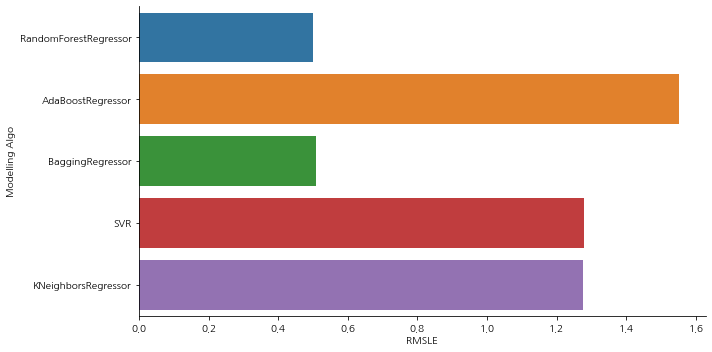

In [ ]:
sns.factorplot(y='Modelling Algo',x='RMSLE',data=rmsle_frame,kind='bar',size=5,aspect=2)

## 트리모델

RandomForestRegressor 조절

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 500, random_state=7)

rfr.fit(X_train, y_train)
print('정확도: ', rfr.score(X_train, y_train))

정확도:  0.9773083255456817


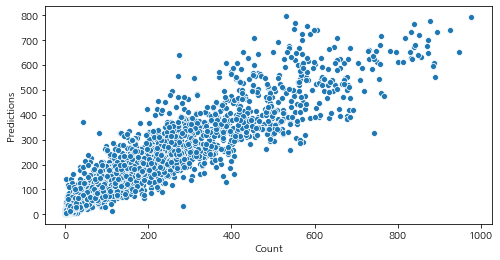

In [ ]:
plt.figure(figsize = (8,4))
pred = rfr.predict(X_test)
sns.scatterplot(x = y_test, y = pred)
plt.xlabel('Count')
plt.ylabel('Predictions')
plt.show()

평가지표 RMSLE

In [ ]:
#다시 모델 학습용 데이터 만들기 
train1 = pd.read_csv('C://Users/dkfl4/OneDrive/바탕 화면/train.csv')
test1 = pd.read_csv('C://Users/dkfl4/OneDrive/바탕 화면/test.csv')

In [ ]:
combine = pd.concat([train1,test1],axis=0)

In [ ]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 1.7+ MB


In [ ]:
combine['tempDate'] = combine.datetime.apply(lambda x:x.split())
combine['weekday'] = combine.tempDate.apply(lambda x: calendar.day_name[datetime.strptime(x[0],"%Y-%m-%d").weekday()])
combine['year'] = combine.tempDate.apply(lambda x: x[0].split('-')[0])
combine['month'] = combine.tempDate.apply(lambda x: x[0].split('-')[1])
combine['day'] = combine.tempDate.apply(lambda x: x[0].split('-')[2])
combine['hour'] = combine.tempDate.apply(lambda x: x[1].split(':')[0])

In [ ]:
combine['year'] = pd.to_numeric(combine.year,errors='coerce')
combine['month'] = pd.to_numeric(combine.month,errors='coerce')
combine['day'] = pd.to_numeric(combine.day,errors='coerce')
combine['hour'] = pd.to_numeric(combine.hour,errors='coerce')

In [ ]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
 12  tempDate    17379 non-null  object 
 13  weekday     17379 non-null  object 
 14  year        17379 non-null  int64  
 15  month       17379 non-null  int64  
 16  day         17379 non-null  int64  
 17  hour        17379 non-null  int64  
dtypes: float64(6), int64(9), object(3)
memory usage: 2.5+ MB


In [ ]:
def badToRight(month):
    if month in [12,1,2]:
        return 4
    elif month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    elif month in [9,10,11]:
        return 3
combine['season'] = combine.month.apply(badToRight)

In [ ]:
combine.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,weekday,year,month,day,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,"[2011-01-01, 00:00:00]",Saturday,2011,1,1,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,"[2011-01-01, 01:00:00]",Saturday,2011,1,1,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,"[2011-01-01, 02:00:00]",Saturday,2011,1,1,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,"[2011-01-01, 03:00:00]",Saturday,2011,1,1,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,"[2011-01-01, 04:00:00]",Saturday,2011,1,1,4


In [ ]:
combine.weekday = combine.weekday.astype('category')

In [ ]:
combine.weekday.cat.categories = ['5','1','6','0','4','2','3']

In [ ]:
dataWindNot0 = combine[combine['windspeed']!=0]
dataWind0 = combine[combine['windspeed']==0]

In [ ]:
dataWind0_df = dataWind0.drop(['windspeed','casual','registered','count','datetime','tempDate'],axis=1)
dataWindNot0_df = dataWindNot0.drop(['windspeed','casual','registered','count','datetime','tempDate'],axis=1)
dataWindNot0_series = dataWindNot0['windspeed']

In [ ]:
rf2 = RandomForestRegressor()
rf2.fit(dataWindNot0_df,dataWindNot0_series)
predicted = rf2.predict(dataWind0_df)
print(predicted)

[ 7.102469  6.632665  6.652631 ...  9.031801 25.02048  11.480785]


In [ ]:
dataWind0['windspeed'] = predicted

C:\Users\dkfl4\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
combine = pd.concat([dataWind0,dataWindNot0],axis=0)

In [ ]:
#우리가 가진 column들 중 값들이 일정하고 정해져있다면 category로 변경해주고
#필요하지 않은 column들은 이제 버린다.
categorizational_columns = ['holiday','humidity','season','weather','workingday','year','month','day','hour']
drop_columns = ['datetime','casual','registered','count','tempDate']

In [ ]:
#categorical하게 변환
for col in categorizational_columns:
    combine[col] = combine[col].astype('category')

In [ ]:
#합쳐진 combine데이터 셋에서 count의 유무로 훈련과 테스트셋을 분리하고 각각을 datetime으로 정렬
train = combine[pd.notnull(combine['count'])].sort_values(by='datetime')
test = combine[~pd.notnull(combine['count'])].sort_values(by='datetime')

#데이터 훈련시 집어 넣게 될 각각의 결과 값들
datetimecol = test['datetime']
yLabels = train['count'] #count
yLabelsRegistered = train['registered'] #등록된 사용자
yLabelsCasual = train['casual'] #임시 사용자


In [ ]:
#필요 없는 column들을 버린 후의 훈련과 테스트 셋
train = train.drop(drop_columns,axis=1)
test = test.drop(drop_columns,axis=1)

In [ ]:
# y is predict value y_ is actual value
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y), 
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [ ]:
#선형 회귀 모델
#선형 회귀모델은 건드릴 만한 내부 attr들이 없음
from sklearn.linear_model import LinearRegression,Ridge,Lasso


lr = LinearRegression()


yLabelslog = np.log1p(yLabels)

lr.fit(train,yLabelslog)

preds = lr.predict(train)

print('RMSLE Value For Linear Regression: {}'.format(rmsle(np.exp(yLabelslog),np.exp(preds),False)))

RMSLE Value For Linear Regression: 0.9773715074932454


In [ ]:
"""
GridSearchCV를 활용하면 우리가 이용하게 될 각각의 모델마다 변경해야 하는 파라미터 튜닝시 어떤 파라미터가 최적의 값을 내는지 등을 알 수 있음.

GridSearchCV 참조:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
https://datascienceschool.net/view-notebook/ff4b5d491cc34f94aea04baca86fbef8/
"""
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#Ridge모델은 L2제약을 가지는 선형회귀모델에서 개선된 모델이며 해당 모델에서 유의 깊게 튜닝해야하는 파라미터는 alpha값이다.
ridge = Ridge()

#우리가 튜닝하고자하는 Ridge의 파라미터 중 특정 파라미터에 배열 값으로 넘겨주게 되면 테스트 후 어떤 파라미터가 최적의 값인지 알려줌 
ridge_params = {'max_iter':[3000],'alpha':[0.001,0.01,0.1,1,10,100,1000]}
rmsle_scorer = metrics.make_scorer(rmsle,greater_is_better=False)
grid_ridge = GridSearchCV(ridge,ridge_params,scoring=rmsle_scorer,cv=5)

grid_ridge.fit(train,yLabelslog)
preds = grid_ridge.predict(train)
print(grid_ridge.best_params_)
print('RMSLE Value for Ridge Regression {}'.format(rmsle(np.exp(yLabelslog),np.exp(preds),False)))

{'alpha': 0.001, 'max_iter': 3000}
RMSLE Value for Ridge Regression 0.977371507247133


In [ ]:
#결과에 대해 GridSearchCV의 변수인 grid_ridge변수에 cv_result_를 통해 alpha값의 변화에 따라 평균값의 변화를 파악 가능
df = pd.DataFrame(grid_ridge.cv_results_)

In [ ]:
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024939,0.006556,0.017153,0.003420,0.001,3000,"{'alpha': 0.001, 'max_iter': 3000}",-1.001793,-0.904119,-1.044029,-1.005293,-0.979746,-0.986996,0.046320,1
1,0.016356,0.001493,0.012568,0.000797,0.01,3000,"{'alpha': 0.01, 'max_iter': 3000}",-1.001793,-0.904119,-1.044029,-1.005293,-0.979746,-0.986996,0.046320,2
2,0.016756,0.000400,0.012167,0.001164,0.1,3000,"{'alpha': 0.1, 'max_iter': 3000}",-1.001794,-0.904119,-1.044031,-1.005293,-0.979746,-0.986996,0.046320,3
3,0.020546,0.001197,0.016755,0.002221,1,3000,"{'alpha': 1, 'max_iter': 3000}",-1.001808,-0.904118,-1.044049,-1.005288,-0.979749,-0.987002,0.046326,4
4,0.018351,0.001197,0.013763,0.002130,10,3000,"{'alpha': 10, 'max_iter': 3000}",-1.001943,-0.904110,-1.044230,-1.005242,-0.979779,-0.987061,0.046377,5


In [ ]:
#Ridge모델은 L1제약을 가지는 선형회귀모델에서 개선된 모델이며 해당 모델에서 유의 깊게 튜닝해야하는 파라미터는 alpha값이다.
lasso = Lasso()

lasso_params = {'max_iter':[3000],'alpha':[0.001,0.01,0.1,1,10,100,1000]}
grid_lasso = GridSearchCV(lasso,lasso_params,scoring=rmsle_scorer,cv=5)
grid_lasso.fit(train,yLabelslog)
preds = grid_lasso.predict(train)
print('RMSLE Value for Lasso Regression {}'.format(rmsle(np.exp(yLabelslog),np.exp(preds),False)))

RMSLE Value for Lasso Regression 0.9773810622676787


In [ ]:
rf = RandomForestRegressor()

rf_params = {'n_estimators':[1,10,100]}
grid_rf = GridSearchCV(rf,rf_params,scoring=rmsle_scorer,cv=5)
grid_rf.fit(train,yLabelslog)
preds = grid_rf.predict(train)
print('RMSLE Value for RandomForest {}'.format(rmsle(np.exp(yLabelslog),np.exp(preds),False)))

RMSLE Value for RandomForest 0.10244680825425369


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb_params={'max_depth':range(1,11,1),'n_estimators':[1,10,100]}
grid_gb=GridSearchCV(gb,gb_params,scoring=rmsle_scorer,cv=5)
grid_gb.fit(train,yLabelslog)
preds = grid_gb.predict(train)
print('RMSLE Value for GradientBoosting {}'.format(rmsle(np.exp(yLabelslog),np.exp(preds),False)))